In [25]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Split the data into train and test datasets

In [26]:
#load data
dataset_train = pd.read_csv('IBM_train.csv')
training_set = dataset_train.iloc[:,1:2].values

In [27]:
training_set

array([[ 206.710007],
       [ 207.179993],
       [ 206.970001],
       ..., 
       [ 153.949997],
       [ 152.070007],
       [ 153.070007]])

In [4]:
#scale the features
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

In [5]:
training_set_scaled

array([[ 0.91054481],
       [ 0.91539402],
       [ 0.91322737],
       ..., 
       [ 0.36617825],
       [ 0.34678091],
       [ 0.3570987 ]])

In [6]:
#create the train data
X_train = []
y_train = []
for i in range(60, 1489):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [7]:
X_train

array([[ 0.91054481,  0.91539402,  0.91322737, ...,  0.78033422,
         0.73586459,  0.74762685],
       [ 0.91539402,  0.91322737,  0.92664052, ...,  0.73586459,
         0.74762685,  0.741333  ],
       [ 0.91322737,  0.92664052,  0.90806847, ...,  0.74762685,
         0.741333  ,  0.77414364],
       ..., 
       [ 0.35843991,  0.36844817,  0.37185306, ...,  0.37701196,
         0.34863804,  0.33790761],
       [ 0.36844817,  0.37185306,  0.40115554, ...,  0.34863804,
         0.33790761,  0.36617825],
       [ 0.37185306,  0.40115554,  0.4249896 , ...,  0.33790761,
         0.36617825,  0.34678091]])

In [8]:
y_train

array([ 0.741333  ,  0.77414364,  0.79075529, ...,  0.36617825,
        0.34678091,  0.3570987 ])

In [9]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [10]:
X_train

array([[[ 0.91054481],
        [ 0.91539402],
        [ 0.91322737],
        ..., 
        [ 0.78033422],
        [ 0.73586459],
        [ 0.74762685]],

       [[ 0.91539402],
        [ 0.91322737],
        [ 0.92664052],
        ..., 
        [ 0.73586459],
        [ 0.74762685],
        [ 0.741333  ]],

       [[ 0.91322737],
        [ 0.92664052],
        [ 0.90806847],
        ..., 
        [ 0.74762685],
        [ 0.741333  ],
        [ 0.77414364]],

       ..., 
       [[ 0.35843991],
        [ 0.36844817],
        [ 0.37185306],
        ..., 
        [ 0.37701196],
        [ 0.34863804],
        [ 0.33790761]],

       [[ 0.36844817],
        [ 0.37185306],
        [ 0.40115554],
        ..., 
        [ 0.34863804],
        [ 0.33790761],
        [ 0.36617825]],

       [[ 0.37185306],
        [ 0.40115554],
        [ 0.4249896 ],
        ..., 
        [ 0.33790761],
        [ 0.36617825],
        [ 0.34678091]]])

In [11]:
#import Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [12]:
#define NN
regressor = Sequential()

In [13]:
regressor.add(LSTM(units = 50, return_sequences= True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

In [14]:
regressor.add(LSTM(units = 50, return_sequences= True))
regressor.add(Dropout(0.2))

In [15]:
regressor.add(LSTM(units = 50, return_sequences= True))
regressor.add(Dropout(0.2))

In [16]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [17]:
regressor.add(Dense(units = 1))

In [18]:
#compile NN
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [19]:
#execute NN
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
1429/1429 [==============================] - 11s 8ms/step - loss: 0.0347
Epoch 2/100
1429/1429 [==============================] - 6s 4ms/step - loss: 0.0071
Epoch 3/100
1429/1429 [==============================] - 7s 5ms/step - loss: 0.0067
Epoch 4/100
1429/1429 [==============================] - 7s 5ms/step - loss: 0.0068
Epoch 5/100
1429/1429 [==============================] - 8s 6ms/step - loss: 0.0072
Epoch 6/100
1429/1429 [==============================] - 6s 4ms/step - loss: 0.0058
Epoch 7/100
1429/1429 [==============================] - 5s 4ms/step - loss: 0.0054
Epoch 8/100
1429/1429 [==============================] - 7s 5ms/step - loss: 0.0057
Epoch 9/100
1429/1429 [==============================] - 7s 5ms/step - loss: 0.0053
Epoch 10/100
1429/1429 [==============================] - 6s 4ms/step - loss: 0.0050
Epoch 11/100
1429/1429 [==============================] - 7s 5ms/step - loss: 0.0047
Epoch 12/100
1429/1429 [==============================] - 7s 5ms/step - l

1429/1429 [==============================] - 6s 4ms/step - loss: 0.0012
Epoch 98/100
1429/1429 [==============================] - 6s 5ms/step - loss: 0.0012
Epoch 99/100
1429/1429 [==============================] - 7s 5ms/step - loss: 0.0011
Epoch 100/100
1429/1429 [==============================] - 7s 5ms/step - loss: 0.0012


In [20]:
dataset_test = pd.read_csv('IBM_test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [21]:
#load test-data and create test-set
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

In [22]:
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])

In [23]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

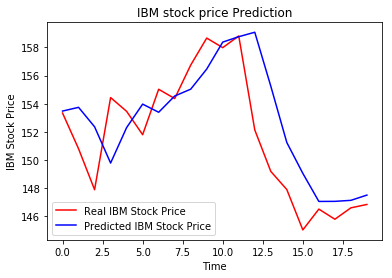

In [24]:
#plot true and predicted values
plt.plot(real_stock_price, color = 'red', label = 'Real IBM Stock Price')
plt.plot(predicted_stock_price,color='blue', label = 'Predicted IBM Stock Price')
plt.title('IBM stock price Prediction')
plt.xlabel('Time')
plt.ylabel('IBM Stock Price')
plt.legend()
plt.show()